In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv(r'C:\Users\shubhamagrawal.NAGARRO\Desktop\Assignment\Assignment\US_Heart_Patients.csv')

In [19]:
df.head(10)


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
education,4130.0,1.979903,1.019943,1.00,1.00,2.000,3.00,4.0
currentSmoker,4237.0,0.494218,0.500026,0.00,0.00,0.000,1.00,1.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
BP Meds,4180.0,0.029665,0.169682,0.00,0.00,0.000,0.00,1.0
prevalentStroke,4231.0,0.005909,0.076650,0.00,0.00,0.000,0.00,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.000,1.00,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.000,0.00,1.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [22]:
df.isnull()
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [23]:
df['Gender'].replace( 'Female',0,inplace=True)
df['Gender'].replace('Male',1,inplace=True)


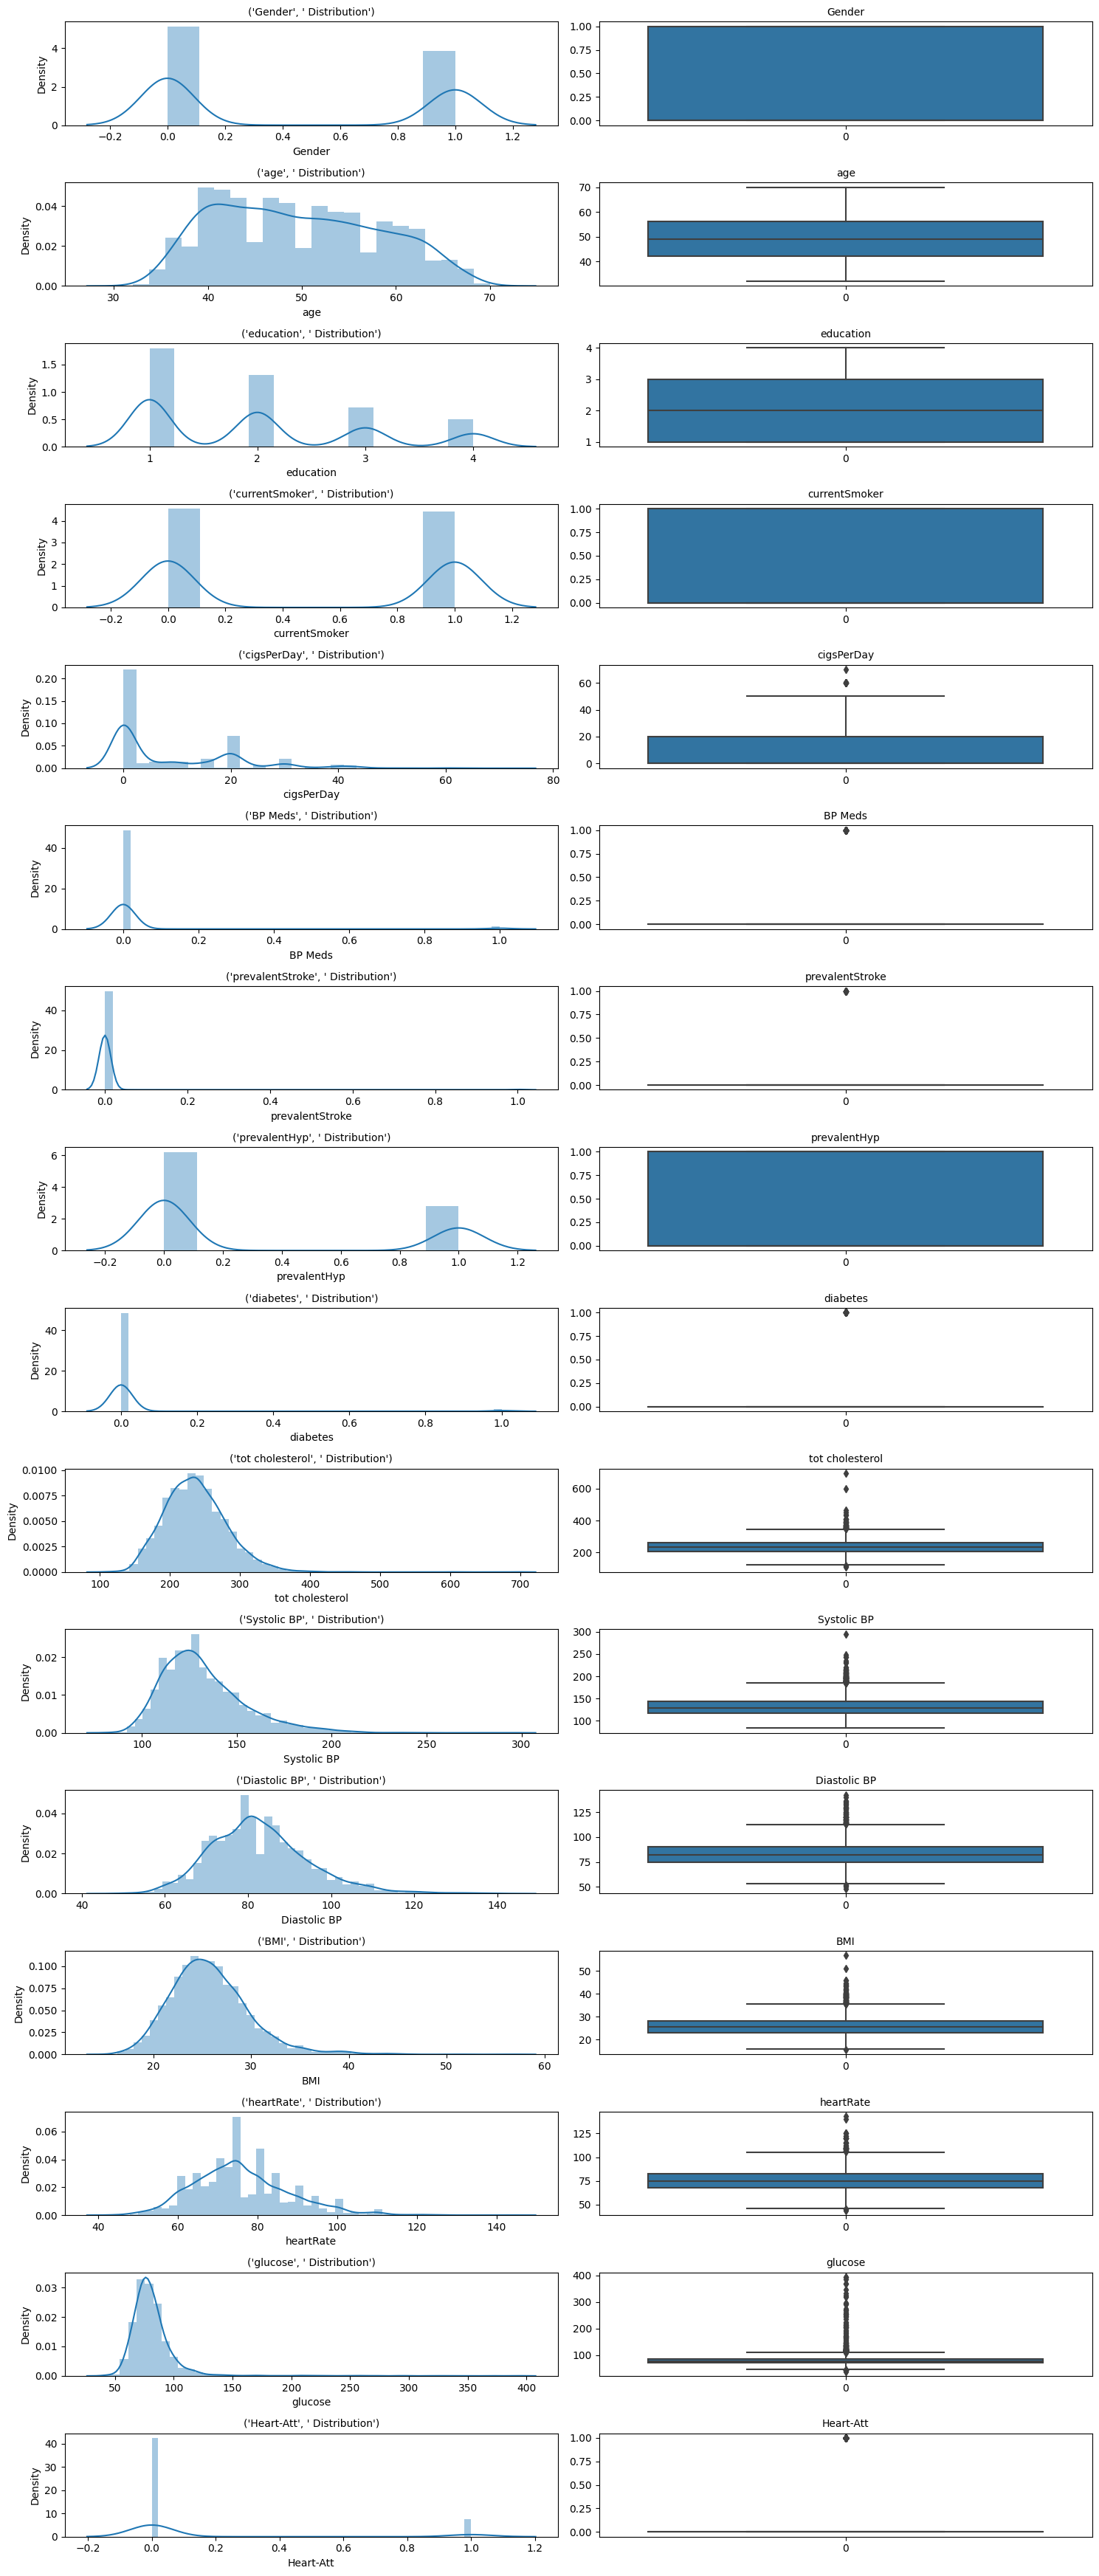

In [24]:

fig, axes = plt.subplots(nrows=len(df.columns),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in df.columns:
    a = sns.distplot(df[i] , ax=axes[count][0],kde=True)
    a.set_title((i," Distribution"),fontsize=10)

    a = sns.boxplot(df[i], orient = "v", ax=axes[count][1])
    a.set_title(i,fontsize=10)

    count+=1

plt.tight_layout()
plt.show()

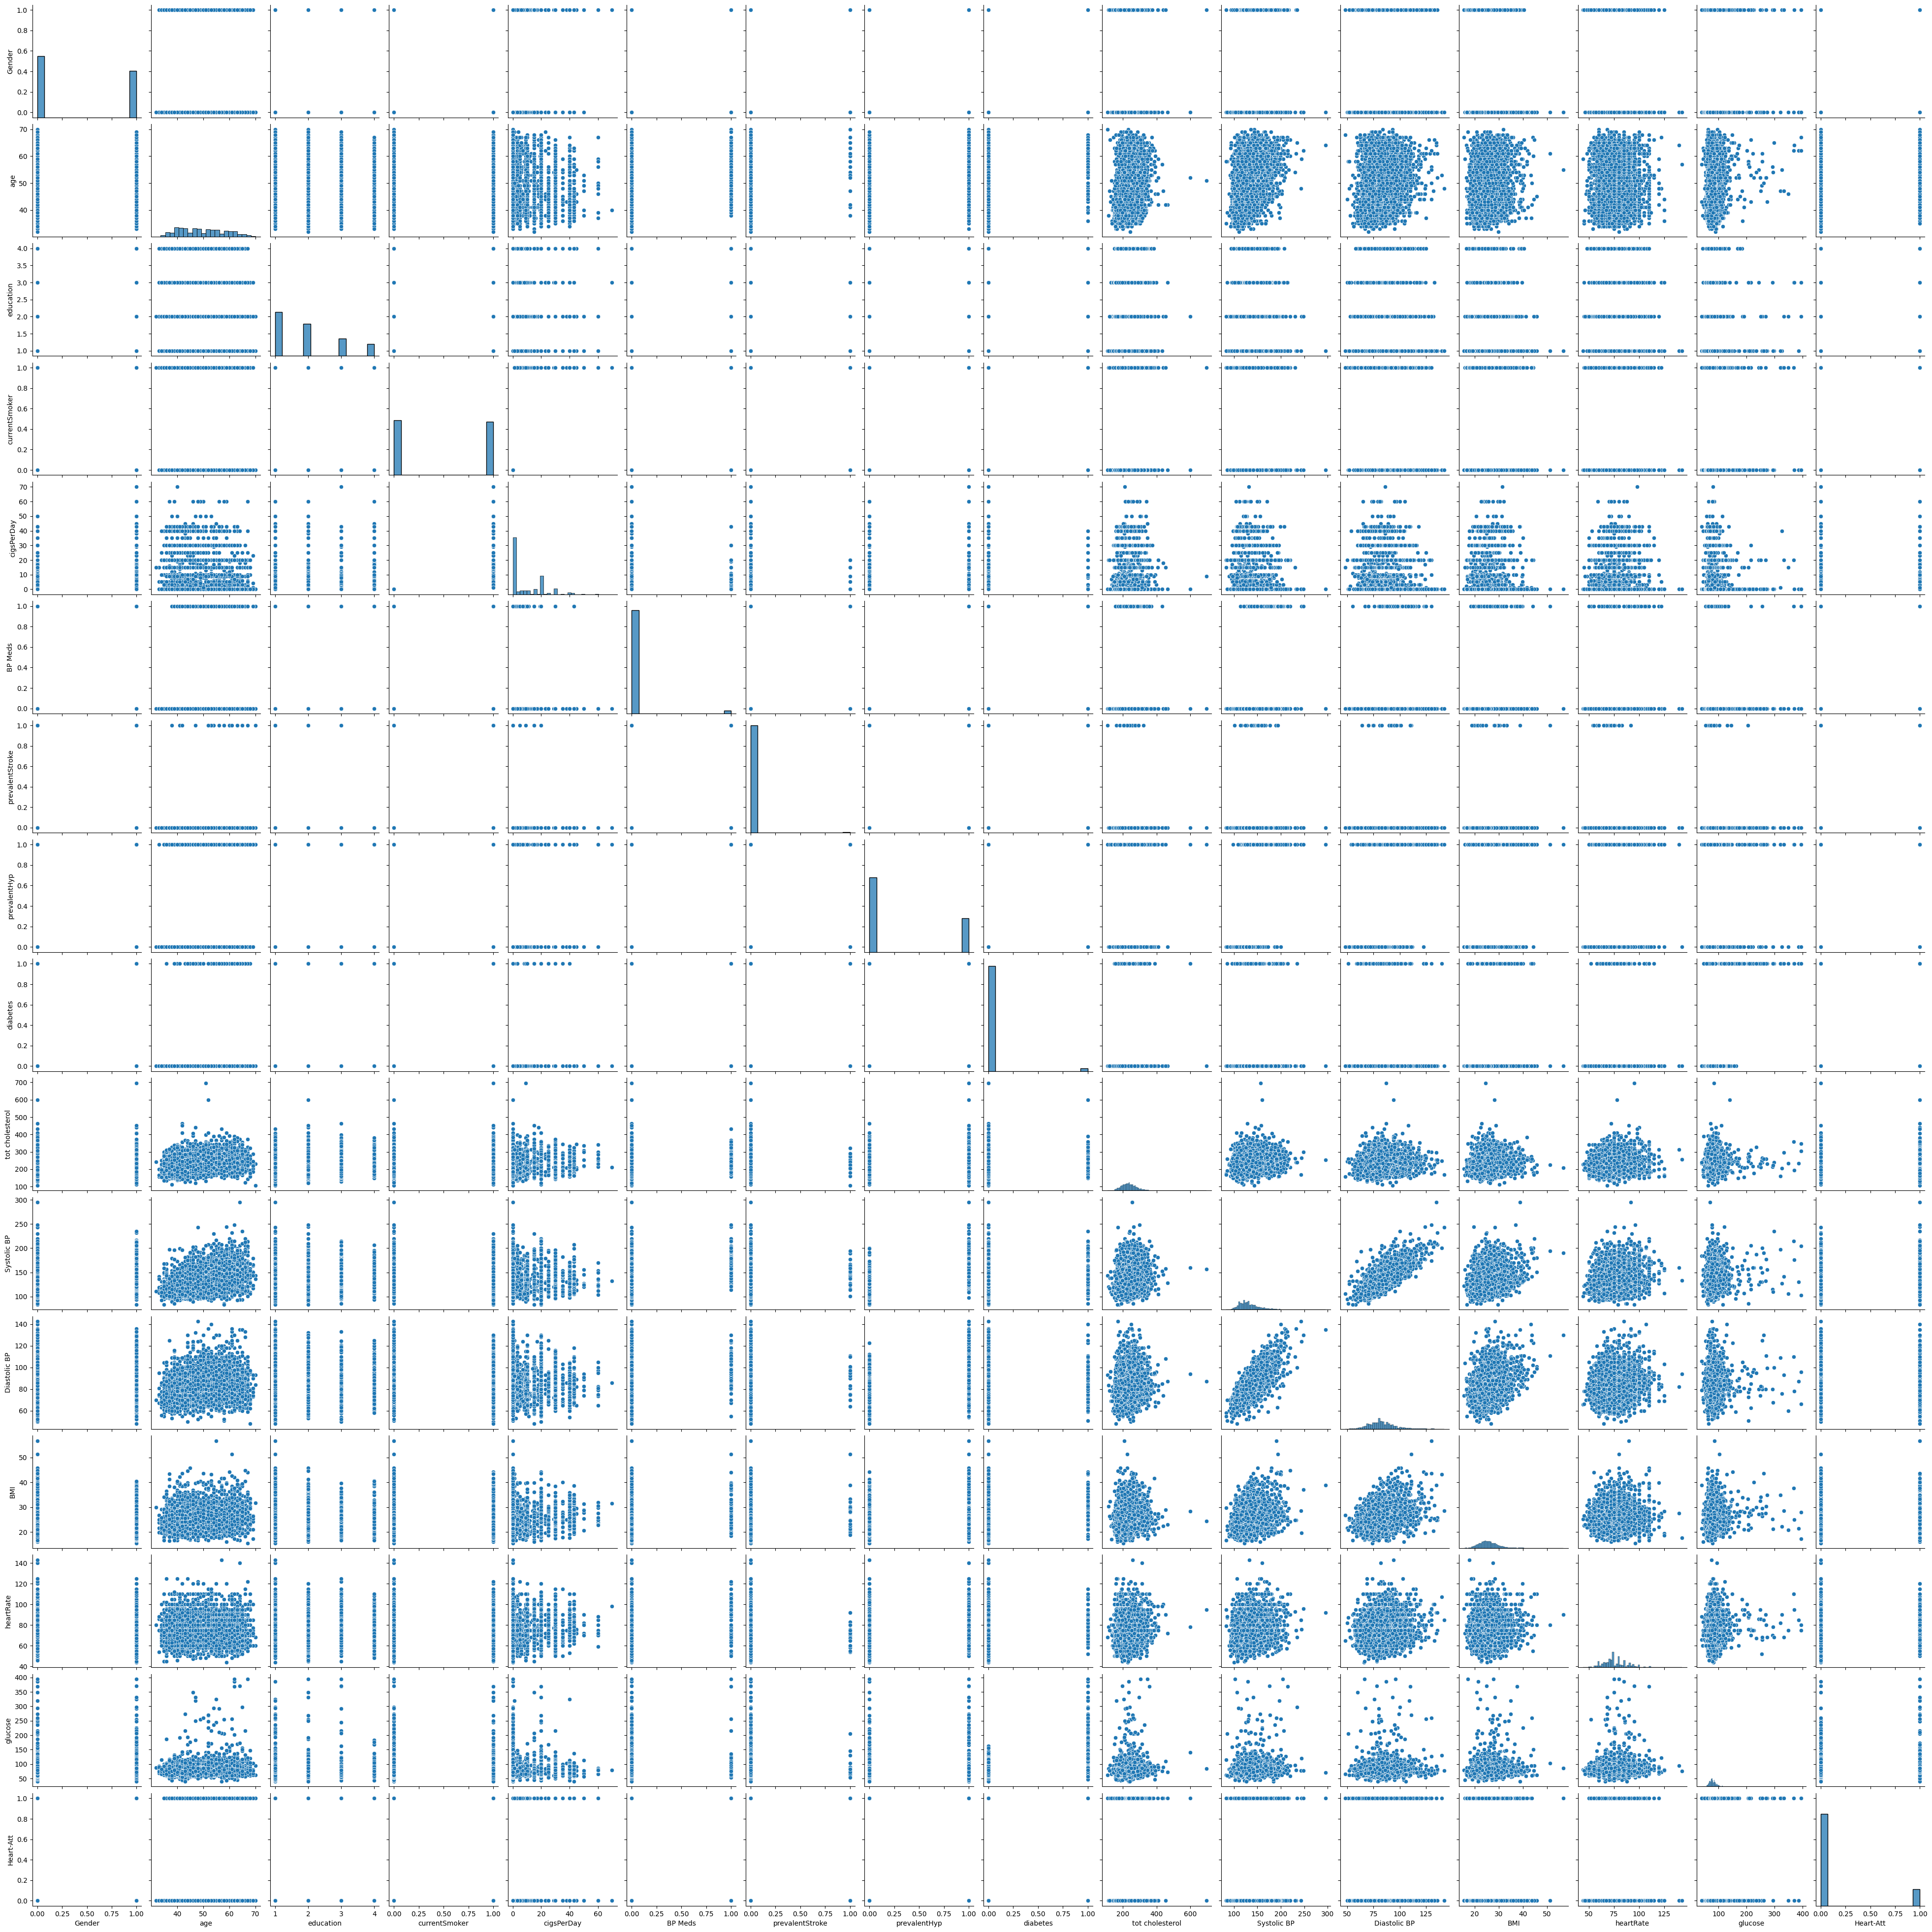

In [25]:
sns.pairplot(df)

In [26]:
df.corr(numeric_only=True)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
Gender,1.000000,-0.029264,0.017552,0.197179,0.316802,-0.050901,-0.004627,0.006460,0.015532,-0.070261,-0.035595,0.059266,0.081901,-0.116894,0.006198,0.088801
age,-0.029264,1.000000,-0.165584,-0.212868,-0.192650,0.123420,0.057811,0.306096,0.101539,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767,0.226166
education,0.017552,-0.165584,1.000000,0.017627,0.008257,-0.011071,-0.035254,-0.081289,-0.037550,-0.022926,-0.129614,-0.061678,-0.136673,-0.055574,-0.034838,-0.053857
currentSmoker,0.197179,-0.212868,0.017627,1.000000,0.769790,-0.049186,-0.033061,-0.103521,-0.044425,-0.046732,-0.130143,-0.107956,-0.166571,0.061614,-0.056546,0.018707
cigsPerDay,0.316802,-0.192650,0.008257,0.769790,1.000000,-0.046348,-0.032709,-0.066986,-0.037112,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460,0.057923
BP Meds,-0.050901,0.123420,-0.011071,-0.049186,-0.046348,1.000000,0.117902,0.261561,0.052008,0.080869,0.254635,0.194487,0.101077,0.015461,0.051282,0.087759
prevalentStroke,-0.004627,0.057811,-0.035254,-0.033061,-0.032709,0.117902,1.000000,0.075048,0.006923,0.000143,0.057292,0.045341,0.025978,-0.017614,0.018463,0.062127
prevalentHyp,0.006460,0.306096,-0.081289,-0.103521,-0.066986,0.261561,0.075048,1.000000,0.077964,0.164223,0.696447,0.615713,0.301014,0.147548,0.086504,0.176736
diabetes,0.015532,0.101539,-0.037550,-0.044425,-0.037112,0.052008,0.006923,0.077964,1.000000,0.039732,0.113213,0.051396,0.087547,0.049328,0.617860,0.097485
tot cholesterol,-0.070261,0.262766,-0.022926,-0.046732,-0.026347,0.080869,0.000143,0.164223,0.039732,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644,0.082508


In [27]:
import numpy as np
import statistics as st
for column in df.iloc[:,:-1].columns:
    mode = st.mode(df[column])
    df[column] = df[column].fillna(mode)

In [28]:
def outlier_cap(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 -Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range,upper_range


In [29]:
import numpy as np
for column in df.iloc[:,:-1].columns:
    lr,ur = outlier_cap(df[column])
    df[column] = np.where(df[column]>ur, ur,df[column])
    df[column] = np.where(df[column]<lr, lr,df[column])

<AxesSubplot: >

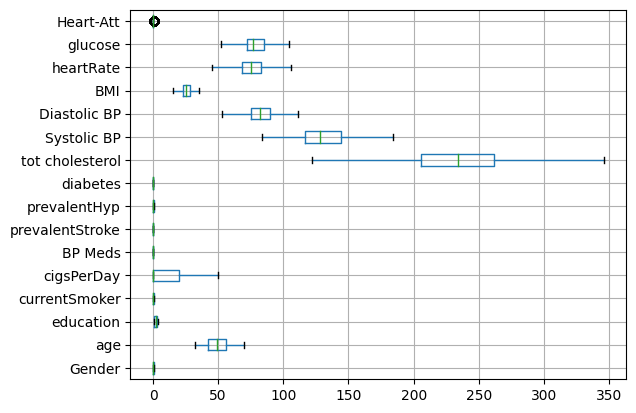

In [30]:
df.boxplot(vert=0)

In [31]:
y=df['Heart-Att']
x=df.drop(columns=['Heart-Att'])
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)


print(metrics.f1_score(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))


  

0.27868852459016397
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       725
           1       0.28      0.28      0.28       123

    accuracy                           0.79       848
   macro avg       0.58      0.58      0.58       848
weighted avg       0.79      0.79      0.79       848

[[638  87]
 [ 89  34]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
gnb = DecisionTreeClassifier()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)


print(metrics.f1_score(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))

0.22393822393822396
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       725
           1       0.21      0.24      0.22       123

    accuracy                           0.76       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.77      0.76      0.77       848

[[618 107]
 [ 94  29]]


In [34]:
# model 1 GaussianNB is best because it is performing good on both classes 